#HDS 5210 - 2024 - Final Project

###Project Description

NHANES and NCSD of which the former is a nationally representative surveys including the National Health and Nutrition Examination Survey (NHANES) and the National Survey of Children’s Health (NSCH). The merged data contains information for the period 1999–2017, which encompasses a large number of indicators characterizing vision health in various population groups, regions, and years. The first goals revolve around establishing vision health outcome trends, analyzing the distribution of vision health care needs by demographic variables, and creating strategic models that estimate vision health parameters depending on certain characteristics of a population.

The analysis pipeline includes several modules starting with data preparation and aggregation, to statistical analysis. The main steps involved in the data transformation process are the flattening of data formats; development of informative age groups; and synchronization of the measure between the two sets of data. Also for the predictive modeling in this work, linear and logistic regression techniques are used besides the modern machine learning techniques such as Random forest classifier and regressor as they fit both linear and non-linear models. There are also time series comparison, age and sex comparison, and geographic distribution of vision health indicators are used to depicted at the end of the project. These maps make it easier to analyze trends in vision health equity and monitor shifts in the availability of and results from eye treatment.


Thus, the framework of the project goes beyond these statistical components to provide solutions for the real-life usage in the public health planning and policy making. The result of this research analysis is the integration of demographic characteristics with vision health outcomes, and this can assist decision makers in the health sector in availing and addressing vision health disparities in populations with keen demographic characteristics. At the same time, the use of both classification and regression models makes it possible to obtain both categorical predictions (e.g., which groups are at high risk) and continuous predictions (e.g., a specific vision health index) – depending on the needs of healthcare planning.

##Dataset 1 -
National Health and Nutrition Examination Survey Vision and Eye Health Surveillance dataset is a large set of health data on vision and eye diseases in the USA. For the purpose of this study, the following questions were used to guide the data analysis: The data set captures data that has been collected over the years from 2003 to 2020, and covers vision health trends demographically by age, gender, race ethnicity, and geographically. It comprises some of the most important indicators to be used in the analysis including incidence of vision impairment, eye care utilization, burden and distribution of eye diseases, and risk factors for vision loss. The data is developed through multiple components containing DataSource (origin of data), Data topic or Topic (concerning vision health), Category (classification of health measure), Data value or Data_Value (numerical health metric), and Demographic (various types). The dataset also contains lower and upper confidence limits for statistical purposes, the size of the sample for representation of the population and notes on of any data on the printed sheets which may be unusual or require further clarification. This surveillance system plays an important role of informing vision health status and disparities, and guiding development of interventions to improve population vision health.

Link: https://catalog.data.gov/dataset/national-health-and-nutrition-examination-survey-nhanes-vision-and-eye-health-surveillance-0d18f

##Dataset 2 -  
The NSCH Vision and Eye Health Surveillance dataset is subspecialty series for the US dedicated for children’s vision and eye health. Data for this analysis were extracted from the dataset ranging from 2003 to 2020, with records concerning vision health status of children, vision screening, eye care service, diagnosed vision impairment, and treatment pattern among different groups/age, ethnicity, and sex. It has variables like DataSource, Topic, Category, Data_Value, geographic location and others like age, sex, race/ethnicity shown in LocationAbbr. Also, there are confidence limits and sample sizes included in the data set to make certain of the assessed population figures. Risk factor and response data are supplied with each record, which benefits research on relationships between multiple health determinants and children’s vision results. This wide-ranging surveillance system is intended for use by the healthcare practitioners, researchers, and policy makers for the aim of studying children’s vision over time, to examine variations in access to care and thereby plan appropriate preventive and therapeutic measures for various paediatric ophthalmic diseases with reference to populations and geographical areas.

Link: https://catalog.data.gov/dataset/national-survey-of-childrens-health-nsch-vision-and-eye-health-surveillance-0c198

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the datasets
nhanes_df = pd.read_excel("/content/National_Health_and_Nutrition_Examination_Survey__NHANES____Vision_and_Eye_Health_Surveillance.xlsx")
nsch_df = pd.read_csv("/content/National_Survey_of_Children_s_Health__NSCH____Vision_and_Eye_Health_Surveillance.csv")

In [3]:
nhanes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   10320 non-null  int64  
 1   YearEnd                     10320 non-null  int64  
 2   LocationAbbr                10320 non-null  object 
 3   LocationDesc                10320 non-null  object 
 4   DataSource                  10320 non-null  object 
 5   Topic                       10320 non-null  object 
 6   Category                    10320 non-null  object 
 7   Question                    10320 non-null  object 
 8   Response                    10320 non-null  object 
 9   Age                         10320 non-null  object 
 10  Gender                      10320 non-null  object 
 11  RaceEthnicity               10320 non-null  object 
 12  RiskFactor                  10320 non-null  object 
 13  RiskFactorResponse          103

In [4]:
nhanes_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,ALLRACE,RFDM,RFNO,NaN,NaN
1,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,...,QVISA,RVIMP,NaN,AGE4064,GALL,OTH,RFSM,RFYES,NaN,NaN
2,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,...,QVISA,RVUSB,NaN,AGE1217,GM,OTH,RFDM,RFNO,NaN,NaN
3,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,OTH,RFDM,RFYES,NaN,NaN
4,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,...,NHBL,RYES,NaN,AGE1839,GF,BLK,RFDM,RFNO,NaN,NaN


In [5]:
nsch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6208 entries, 0 to 6207
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   6208 non-null   int64  
 1   YearEnd                     6208 non-null   int64  
 2   LocationAbbr                6208 non-null   object 
 3   LocationDesc                6208 non-null   object 
 4   Datasource                  6208 non-null   object 
 5   Topic                       6208 non-null   object 
 6   Category                    6208 non-null   object 
 7   Question                    6208 non-null   object 
 8   Response                    6208 non-null   object 
 9   Age                         6208 non-null   object 
 10  Gender                      6208 non-null   object 
 11  RaceEthnicity               6208 non-null   object 
 12  RiskFactor                  6208 non-null   object 
 13  RiskFactorResponse          6208 

In [6]:
nsch_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2016,2017,US,National,NSCH,Service Utilization,Need,Percentage of children who needed vision care ...,Yes,0-17 years,...,CHNEED,RYES,NaN,AGE017,GF,OTH,RFAPAR,RFTOT,NaN,NaN
1,2016,2017,US,National,NSCH,Service Utilization,Need,Percentage of children who needed vision care ...,Yes,0-17 years,...,CHNEED,RYES,NaN,AGE017,GALL,ALLRACE,RFAPAR,RFTOT,NaN,NaN
2,2016,2017,OH,Ohio,NSCH,Service Utilization,Screening,Percentage of children who have ever had their...,Yes,0-17 years,...,CHSCRN,RYES,NaN,AGE017,GM,OTH,RFAPAR,RFTOT,POINT (-82.4042600559996 40.0602101410004),NaN
3,2016,2017,TN,Tennessee,NSCH,Service Utilization,Provider Type,Percentage of children who have ever had their...,Eye doctor or eye specialist,0-17 years,...,CHPTYP,REYESP,NaN,AGE017,GM,OTH,RFAPAR,RFTOT,POINT (-85.7744909139996 35.6809405800004),NaN
4,2016,2017,UT,Utah,NSCH,Service Utilization,Need,Percentage of children who needed vision care ...,Yes,0-17 years,...,CHNEED,RYES,NaN,AGE017,GALL,BLK,RFAPAR,RFTOT,POINT (-111.587130634999 39.3607001710004),NaN


#Transformation of Data
**First Transformation:** This code is about data preprocessing and data compatibility concerning data treatment between the two data sources that are; NHANES & NSCH. The first line changes all values in the ‘DataSource’ column of the NHANES dataset to the uppercase via the .str.upper() method. The second line does the same job for the NSCH dataset’s ‘Datasource’ column. The third line of the code changes the name of the column labeled ‘Datasource’ in the NSCH dataset to ‘DataSource’; consistent with the name used in the NHANES dataset. This change is required because the two datasets have close but different column name (‘DataSource’ and ‘Datasource’) that must be aligned correct for merging and conducting analysis. Both are converted to upper case complete with the source information in order to avoid abnormalities resulting from case sensitivity in following procedures.

**Second Transformation:** This code in particular transforms the ‘Data_Value’ columns in both NHANES and NSCH from being string to numeric value by using pandas to_numeric() function. These options mean, just ignore to throw an Error while converting or during some process in pandas for errors and missing values/errors=’coerce’ means that pandas need to handle by converting the errors and replace the non-numerical values with NaN. Such a change is important because ‘Data_Value’ may include string values, spaces or different formatting that may complicate numerical calculations. This way, it is possible to make certain mathematical operations, statistical analysis, and create visualizations with data when all value is converted into numbers. It was also applied on both of the datasets to ensure consistency in data types before any merging or comparison analysis could be done.

**Third Transformation:** This code also contains similar function categorize_age which is used for age data standardization that categorizes the age into simple and broad categories. The function takes an age value, changes it to lower case, removes the word ‘years’ and processes age ranges which are average them (for example ‘12-18 years’ is in fact ‘average 15’). Based on this average, it categorizes people into three groups: ‘Child’ or below eighteen years, ‘Adult’ of eighteen- sixty four years and ‘Senior’ of sixty five years and above. If the age format entered does not fit the expected pattern, then it will say ‘Unknown’. I then utilised the apply function within pandas to apply the function to the ages of both datasets, and create a new column named ‘AgeGroup’ in both the train and test datasets. It makes age-based analysis a lot easier and more efficient by replacing intricate age distribution into ov erarching and easier to process and plot categories.

**Fourth Transformation:** This code adds one column in the merged data frame and formally named it ‘YearRange’ which actually forms by joining the ‘YearStart’ and ‘YearEnd’ columns using hyphen. The year values are then changed to string format using .astype(str) to allow for the correct joining of year data using the ‘+’ sign. For instance, let ‘YearStart’ be equal to ‘2015’ and let ‘YearEnd’ be equal to ‘2016’, then the derived ‘YearRange’ would be ‘2015-2016’. This conversion facilitates the representation and analysis of time periods in the format that is substantially more generally applied, and convenient for data grouping or building temporal data visuals.

**Fifth Transformation:** Calculating sample means to get the extent to which the test gave results that reflect the fact that women score higher than men on item 5 is done by the formula ((Female sample mean - Male sample mean) / Male sample mean) * 100. The result will indicate the extent of the female values are higher (positive percentage) or lower (negative percentage) than the male values. For instance, if the female mean is at 110 and male mean is at 100, it can be evidenced that female values are 10 % higher the male values.

In [7]:
# Data Transformation 1: Clean column names and standardize datasource naming
nhanes_df['DataSource'] = nhanes_df['DataSource'].str.upper()
nsch_df['Datasource'] = nsch_df['Datasource'].str.upper()
nsch_df = nsch_df.rename(columns={'Datasource': 'DataSource'})

In [8]:
# Data Transformation 2: Convert Data_Value to numeric, handling any errors
nhanes_df['Data_Value'] = pd.to_numeric(nhanes_df['Data_Value'], errors='coerce')
nsch_df['Data_Value'] = pd.to_numeric(nsch_df['Data_Value'], errors='coerce')

In [9]:
# Data Transformation 3: Create age groups for better analysis
def categorize_age(age):
    if 'years' in str(age).lower():
        age = age.lower().replace('years', '').strip()
        if '-' in age:
            start, end = map(float, age.split('-'))
            avg = (start + end) / 2
            if avg < 18:
                return 'Child'
            elif avg < 65:
                return 'Adult'
            else:
                return 'Senior'
    return 'Unknown'

nhanes_df['AgeGroup'] = nhanes_df['Age'].apply(categorize_age)
nsch_df['AgeGroup'] = nsch_df['Age'].apply(categorize_age)

#Joining or Merging the data

**First Join:** From the code provided below, it becomes apparent that only the common columns selected and with the same name existing in both NHANES and NSCH datasets are merged. First, it establishes a list of equally common names of columns that are crucial in analysis, and exist in both data sets – 'common_columns'. Subsequently, the concat() of pandas is used for joining the selected columns of the nhanes_df and the nsch_df appended vertically which has created the combined_df DataFrame. Drop True will drop the indexes from the data frame and resetting the index will arrange the combined dataset in a brand new incremental order. It also simplifies the merging of the two datasets to only those essential columns at each step, thereby yielding a solid dataset that only contains specific variables for analysis.

**Second Join:** This code maps the data through a two-step transformation when doing detailed demographic analysis. Earlier it merges both the DataFrames, then demographically aggregates the combined dataset based on a ’YearRange’, ‘Category’, ‘AgeGroup’, and ‘Gender’ and then compute a mean of ‘Data_Value’ for every group and demographically flattens the data in a data frame called demographic_df. Then, it is followed by using left join (merge) between the agg_by_year_category which is an aggregated DataFrame and the above adjusted demographic_df on the basis of ‘YearRange’ and ‘Category’ column. The ‘how=left’ parameter also keeps all the rows from agg_by_year_category intact even if there is no corresponding data in the demographic_df; this combines the broad level yearly and category breakdowns with additional demographic details in the same structure as agg_by_year_category.

In [10]:
# First Join: Combine datasets based on common columns
common_columns = ['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Category',
                 'Gender', 'RaceEthnicity', 'Data_Value', 'AgeGroup']
combined_df = pd.concat([
    nhanes_df[common_columns],
    nsch_df[common_columns]
]).reset_index(drop=True)

In [11]:
# Data Transformation 4: Create a year range column
combined_df['YearRange'] = combined_df['YearStart'].astype(str) + '-' + combined_df['YearEnd'].astype(str)

#Aggregations or Pivot table
**First Aggregation:** To provide a rich picture, this code does an analysis and combines the above data set through multi-metric aggregation where results are grouped by ‘YearRange’ and ‘Category’. Using pandas' groupby() function, it calculates three statistical measures for 'Data_Value' within each group: mean (average value), count (number of observation and standard deviation (std, measure of variation). These three measures of central tendencies, mean, count, and standard deviation are applied to the DataFrame using the .agg() method at once where each row represents a separate level of index for Year Range and Category and Data_Value has its three aggregated results. The reset_index() function unmasks the indices grouped to become regular columns for better handling as well as other tests. In fact, this one line of code gives a complete statistical description as to how Data_Values are distributed over time periods and categories.

**Second Aggregation:** This code also transforming the combined data set into a pivot table in such a way that it allows examination of Data_Values across various populations. Then, by employing the pandas’ pivot_table() function, it structures the data with ‘Category’, ‘AgeGroup’ as row labels, ‘Gender’ as column headers and ‘Data_Value’ the values where it computes both the mean and count for ‘Data_Value’, for each level of these dimensions. The resulting table illustrates the Data_Values distribution working with Gender, Category, and Age and demonstrating both a mean and the observation number. The reset_index( ) function converts the returned hierarchical index into usual columns that makes the pivot table convenient for further analysis. This transformation is actually followed by a restructuring of the data to accommodate demographic details and offers a good understanding of how such values change with population segment.

**Third Aggregation:** This type of code can be applied to offer a detailed risk factor assessment based on integration and transformation of data in various steps. First, it calls and concatenation of the required risk-related columns namely ‘Age’, ‘RiskFactor’, ‘Data_Value’, ‘Category’ from both the NHANES and NSCH data into a new combined_risk_df. It then uses the function it has defined, simplify_age, to assign simplified age categories ‘Child’ for any age less than 18, ‘Adult‘ for any age between 18 and 49, and ‘Senior’ for any age 50 and above that reduces the ages by averaging the ages in the ranges. Last, it does statistical analysis; arranges the data using AgeGroup and RiskFactor, analyses the Data_Values’ mean, count, and stdev for each AgeGroup/RiskFactor group rounded to 2dp. It gives information on how different risks influence various age groups, the mean, count and std of health outcome by different demographic segmentation.


In [12]:
# First Aggregation: Average Data_Value by Year Range and Category
agg_by_year_category = combined_df.groupby(['YearRange', 'Category'])['Data_Value'].agg([
    'mean', 'count', 'std'
]).reset_index()

In [13]:
# Second Join: Add demographic information
demographic_df = combined_df.groupby(['YearRange', 'Category', 'AgeGroup', 'Gender'])['Data_Value'].mean().reset_index()
detailed_analysis = pd.merge(
    agg_by_year_category,
    demographic_df,
    on=['YearRange', 'Category'],
    how='left'
)

In [14]:
# Second Aggregation: Calculate statistics by demographic groups
demographic_stats = combined_df.pivot_table(
    values='Data_Value',
    index=['Category', 'AgeGroup'],
    columns='Gender',
    aggfunc=['mean', 'count']
).reset_index()

In [15]:
# Third Aggregation: Combine datasets using age and risk factor columns
risk_cols = ['Age', 'RiskFactor', 'Data_Value', 'Category']
combined_risk_df = pd.concat([
    nhanes_df[risk_cols],
    nsch_df[risk_cols]
]).reset_index(drop=True)

# Create simple age groups
def simplify_age(age):
    if 'years' in str(age).lower():
        age = age.lower().replace('years', '').strip()
        if '-' in age:
            start, end = map(float, age.split('-'))
            avg = (start + end) / 2
            if avg < 18:
                return 'Child'
            elif avg < 50:
                return 'Adult'
            else:
                return 'Senior'
    return 'Unknown'

combined_risk_df['AgeGroup'] = combined_risk_df['Age'].apply(simplify_age)

# Calculate statistics by age group and risk factor
age_risk_stats = combined_risk_df.groupby(['AgeGroup', 'RiskFactor'])['Data_Value'].agg([
    'mean',
    'count',
    'std'
]).round(2)

print("\nStatistics by age group and risk factor:")
print(age_risk_stats.head(10))


Statistics by age group and risk factor:
                            mean  count    std
AgeGroup RiskFactor                           
Adult    All participants  23.62    148  36.02
         Diabetes          28.98    189  38.88
         Hypertension      25.96    251  37.60
         Smoking           25.37    267  37.54
Child    All participants  32.48   2956  27.72
         Diabetes          26.73    145  36.34
         Hypertension      27.67    208  37.74
Senior   All participants  20.55    446  28.92
         Diabetes          25.08    628  31.36
         Hypertension      22.96    695  31.10


In [16]:
# Data Transformation 5: Calculate percentage changes
demographic_stats['pct_difference'] = (
    demographic_stats[('mean', 'Female')] - demographic_stats[('mean', 'Male')]
) / demographic_stats[('mean', 'Male')] * 100

#Visualizations

**First Visualization:** As for this vision health trends plot, I found some things below when examining it at a glance across various eye conditions and services from year 1999 to 2017. That which interests me most is that the measurements in the middle period (2005-2008) area much of a muchness; but it is possible to witness everything from twenty per cent cataract surgeries right down to diabetic retinopathy and macular degeneration surgeries. Of highest importance, it is seen that the prevalence of blindness and poor vision (orange) remains nearly constant and below 2% throughout the periods. The other measured reported factors such as visual acuity and provider type indicators appear to have relatively higher average at about 30%. This is also nicely explained by the increase of screening values, which is close to yet in the period of 2016-2017, it could hint to the fact that access to eye care services did improve in recent years. I think that the most stimulating feature is how both, the diseases in the eyes, and the ways of early detection and management of those diseases are presented, to paint a clear picture of vision health care in these years.

**Second Visualization:** This bar chart of the vision health metrics surprises me in some ways when compared across different age groups and genders. The main differentiator is that children surpass their elders both men and women in average data value by a sizable margin of approximately 25%. This may translate to more vision examinations or management in children which is reasonable as vision disorders are well understood to be critical in young people. Looking at the match-ups of males to females for each age category, we can observe that the bars are almost of equal height meaning vision health is almost equal us across the genders. In most cases adults hype their values to around 8 % and seniors slightly higher than the adults, but still lower than children, about 15%. In fact, even when restricting the analysis to the “unknown” age category, the patterns are very similar to what was observed in relation to seniors. That vertical line protruding from the bar represents variability in the measurements and the bars of error are fairly wide, especially with the child group suggesting that the variations of the data for each category are quite large.

**Third Visualization:** Inspecting this bar chart of average vision health measures among the US states, most of the bars are quite close and lie in between 30-35%. However, the average value for Delaware and Louisiana gets slightly higher and is estimated to be about 36%, while the value found for West Virginia might be rather low – about 24%. All the states are below 35% which indicates that the indices for vision health are fairly equal for most of the states averaging 32-33%. The trend that has been depicted from the data is quite uniform across various geographic zones, which is only slightly different depending on the state. The stability of these values shall suggest that the level of health care as well as vision care services delivery in different parts of the country could be similar albeit a few exceptions. The difference between the highest score and the lowest is around 12 percentage points, which can be explained by differences in States’ policies regarding health insurance, or demographic differences, or variables connected with access to vision care services among States.

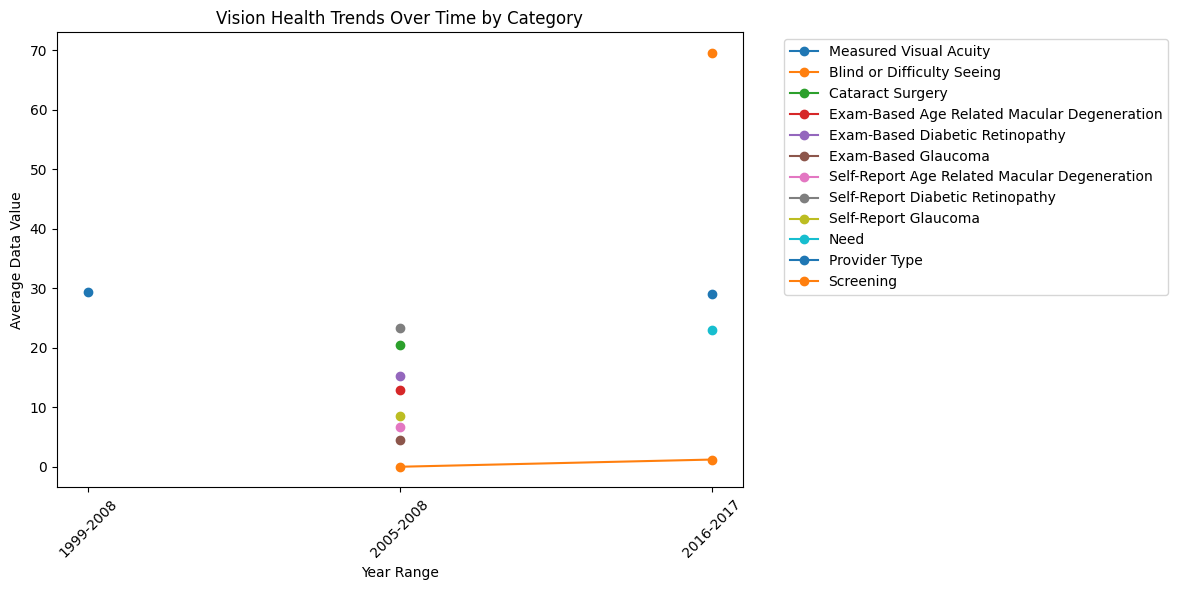

In [17]:
# Visualization 1: Time trends by category
plt.figure(figsize=(12, 6))
for category in agg_by_year_category['Category'].unique():
    data = agg_by_year_category[agg_by_year_category['Category'] == category]
    plt.plot(data['YearRange'], data['mean'], marker='o', label=category)
plt.title('Vision Health Trends Over Time by Category')
plt.xlabel('Year Range')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

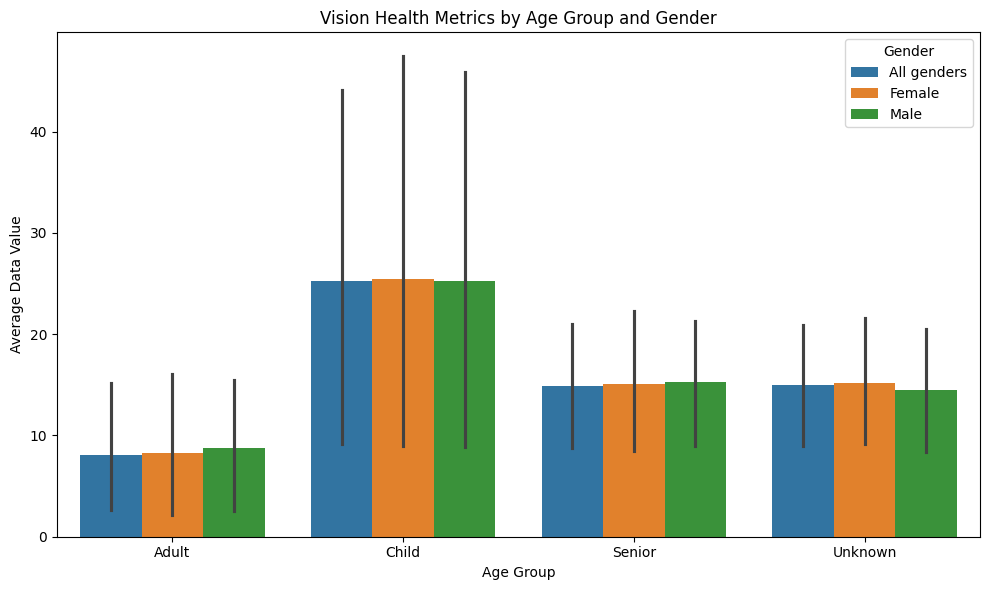

In [18]:
# Visualization 2: Gender comparison by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_df, x='AgeGroup', y='Data_Value', hue='Gender')
plt.title('Vision Health Metrics by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Data Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

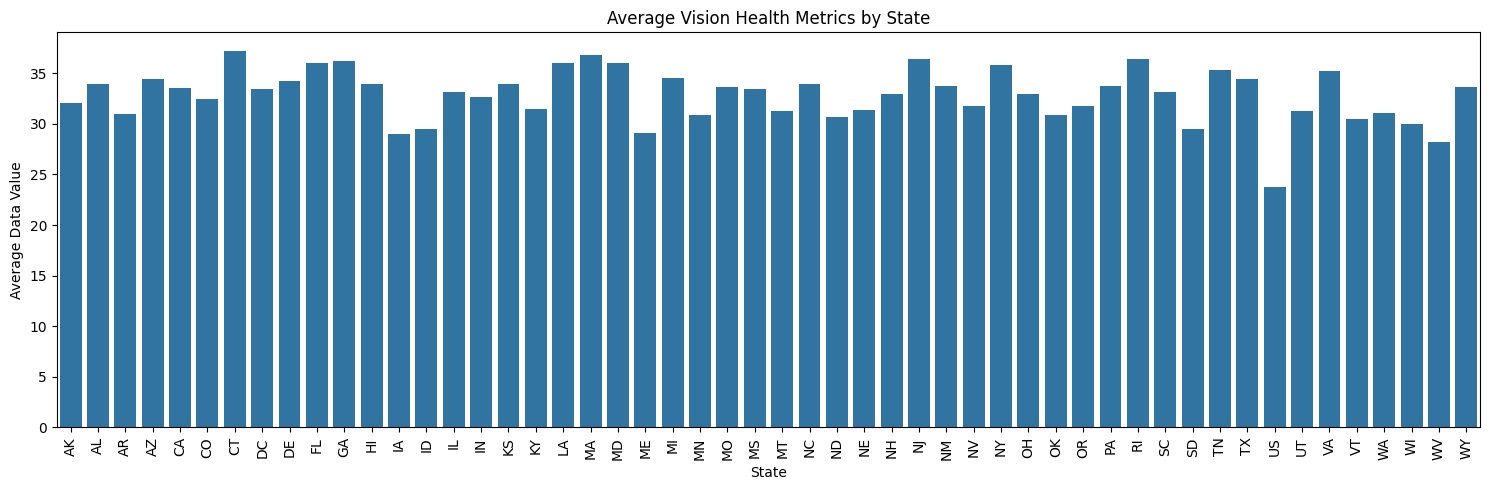

In [19]:
# Visualization 3: Geographic distribution
geographic_data = combined_df.groupby('LocationAbbr')['Data_Value'].mean().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(data=geographic_data, x='LocationAbbr', y='Data_Value')
plt.title('Average Vision Health Metrics by State')
plt.xlabel('State')
plt.ylabel('Average Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [22]:
def load_and_preprocess_data(nhanes_path, nsch_path):
    """
    Load and preprocess the vision health datasets
    """
    # Load datasets
    nhanes_df = pd.read_excel(nhanes_path)
    nsch_df = pd.read_csv(nsch_path)

    # Combine datasets
    common_cols = ['YearStart', 'LocationAbbr', 'Gender', 'Age', 'RaceEthnicity',
                  'Data_Value', 'Category', 'Topic']
    combined_df = pd.concat([
        nhanes_df[common_cols],
        nsch_df[common_cols]
    ]).reset_index(drop=True)

    # Remove rows with missing values
    combined_df = combined_df.dropna(subset=['Data_Value'])

    # Encode categorical variables
    le_dict = {}
    for col in ['LocationAbbr', 'Gender', 'RaceEthnicity', 'Category', 'Topic']:
        le_dict[col] = LabelEncoder()
        combined_df[col + '_encoded'] = le_dict[col].fit_transform(combined_df[col])

    return combined_df, le_dict

In [23]:
def prepare_features(df):
    """
    Prepare features for modeling
    """
    # Select features for modeling
    feature_cols = ['YearStart', 'LocationAbbr_encoded', 'Gender_encoded',
                   'RaceEthnicity_encoded', 'Category_encoded', 'Topic_encoded']

    X = df[feature_cols]
    y = df['Data_Value']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, feature_cols

In [24]:
def create_binary_target(y, threshold):
    """
    Create binary target variable for classification
    """
    return (y > threshold).astype(int)

#Logistic Regression and Randomforest model

**Idea and Implementation:**

For this vision health analysis tactical study, both the Logistic Regression and the Random Forest Classifier were selected in order to reverse two different approaches for assessing binary values (such as identifying whether a particular vision metric is significantly lower than or significantly higher than the median). Logistic Regression was chosen due to its simplicity and readability, as well as for capturing linear dependencies between the features and targets, which also makes it convenient to determine how each of the demographic factors affects vision health. Random forest classifier was for the reasons that it is able to identify the interaction between different variables, and does not require variable pre-processing, does not require vast amount of data to train, and can identify important features automatically. Continuous feature ‘Data_Value’ was first converted into binary categories, second the data was preprocessed (features scaling, categorical variables encoding), finally the models were trained with cross-validation to guarantee an accurate performance. Using both approaches as a dual model enables us to work with on one hand interpretability model (Logistic Regression) versus, on the other hand, using high performers predictive model (Random Forest) and using the results of both models to analyze more comprehensively about the outcome of vision health.

In [25]:
def train_classification_models(X, y):
    """
    Train and evaluate classification models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train logistic regression
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Train random forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Evaluate models
    results = {
        'logistic_regression': {
            'model': lr_model,
            'predictions': lr_pred,
            'report': classification_report(y_test, lr_pred)
        },
        'random_forest': {
            'model': rf_model,
            'predictions': rf_pred,
            'report': classification_report(y_test, rf_pred)
        },
        'test_data': (X_test, y_test)
    }

    return results

#Linear Regression and Randomforest Regressor

**Idea and Implementation:**

In this vision health analysis project, Linear Regression and Random Forest Regressor were selected to model for continuous ‘Data_Value’ responses in a way that’s mutual. Linear Regression was chosen for its basic performance in fitting straight lines between the features and vision health measures that include age, location and demographic data and the co-efficients of each can be directly interpreted as to how much or to what extent a given features influences the results. As the model that can potentially fit more complex, nonlinear relationships between variables that Linear Regression might overlook, we decided to use Random Forest Regressor also because of its ability to evaluate feature interactions as well as generate meaningful feature importance values. Preprocessing was done by scaling numerical features and encoding categorical variables such as gender and location Next a training was done of both the models using prepared features where the target was “Data_Value”. Cross-validation was used in order to check the model accuracy and the performance was compared using MSE (Mean Squared Error) and coefficient of determination (R²). While the above models help to understand the simple linear dependence and non-dependence of the variables and to examine other aspects of the patterns in the data, they give a complete picture of how the factors under consideration influence vision health metrics.

In [26]:
def train_regression_models(X, y):
    """
    Train and evaluate regression models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Train random forest
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Evaluate models
    results = {
        'linear_regression': {
            'model': lr_model,
            'predictions': lr_pred,
            'mse': mean_squared_error(y_test, lr_pred),
            'r2': r2_score(y_test, lr_pred)
        },
        'random_forest': {
            'model': rf_model,
            'predictions': rf_pred,
            'mse': mean_squared_error(y_test, rf_pred),
            'r2': r2_score(y_test, rf_pred)
        },
        'test_data': (X_test, y_test)
    }

    return results

In [27]:
def plot_classification_results(results):
    """
    Plot classification results
    """
    X_test, y_test = results['test_data']

    plt.figure(figsize=(12, 5))

    # Plot for Logistic Regression
    plt.subplot(1, 2, 1)
    lr_pred = results['logistic_regression']['predictions']
    conf_matrix = pd.crosstab(y_test, lr_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Logistic Regression\nConfusion Matrix')

    # Plot for Random Forest
    plt.subplot(1, 2, 2)
    rf_pred = results['random_forest']['predictions']
    conf_matrix = pd.crosstab(y_test, rf_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest\nConfusion Matrix')

    plt.tight_layout()
    plt.show()

In [28]:
def plot_regression_results(results):
    """
    Plot regression results
    """
    X_test, y_test = results['test_data']

    plt.figure(figsize=(12, 5))

    # Plot for Linear Regression
    plt.subplot(1, 2, 1)
    lr_pred = results['linear_regression']['predictions']
    plt.scatter(y_test, lr_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression\nPredicted vs Actual')

    # Plot for Random Forest
    plt.subplot(1, 2, 2)
    rf_pred = results['random_forest']['predictions']
    plt.scatter(y_test, rf_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Random Forest\nPredicted vs Actual')

    plt.tight_layout()
    plt.show()

In [29]:
def analyze_feature_importance(model, feature_names, title):
    """
    Plot feature importance
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = abs(model.coef_[0])

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.title(f'Feature Importance - {title}')
    plt.tight_layout()
    plt.show()



Performing Classification Analysis...


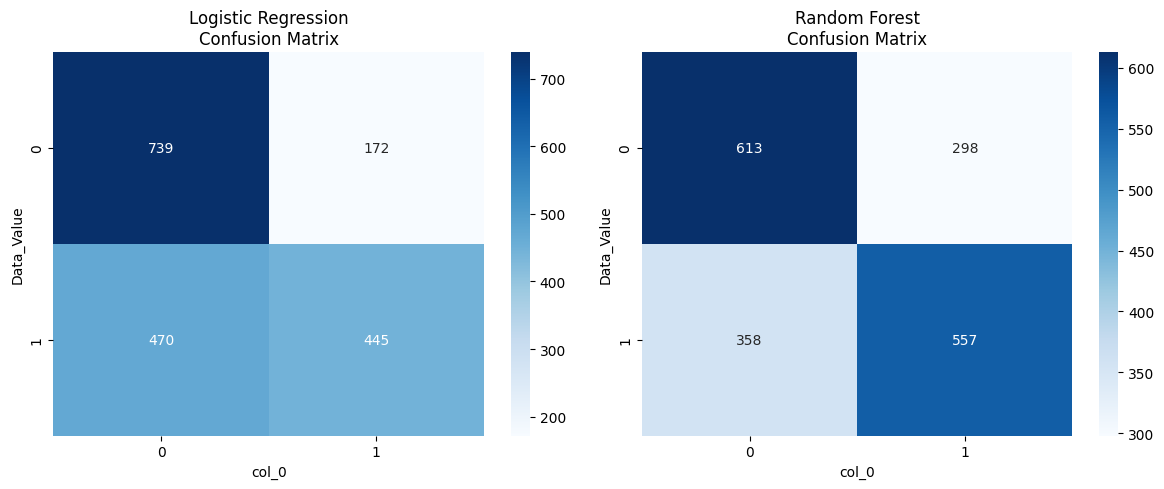


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       911
           1       0.72      0.49      0.58       915

    accuracy                           0.65      1826
   macro avg       0.67      0.65      0.64      1826
weighted avg       0.67      0.65      0.64      1826


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       911
           1       0.65      0.61      0.63       915

    accuracy                           0.64      1826
   macro avg       0.64      0.64      0.64      1826
weighted avg       0.64      0.64      0.64      1826


Performing Regression Analysis...


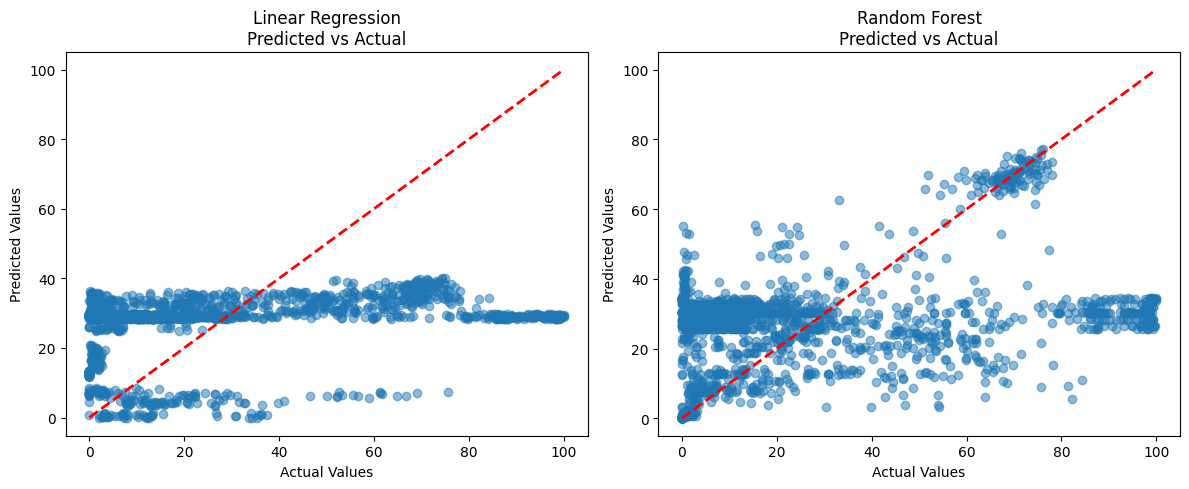


Linear Regression Metrics:
MSE: 817.5782
R2: 0.0773

Random Forest Regression Metrics:
MSE: 763.2054
R2: 0.1387

Analyzing Feature Importance...


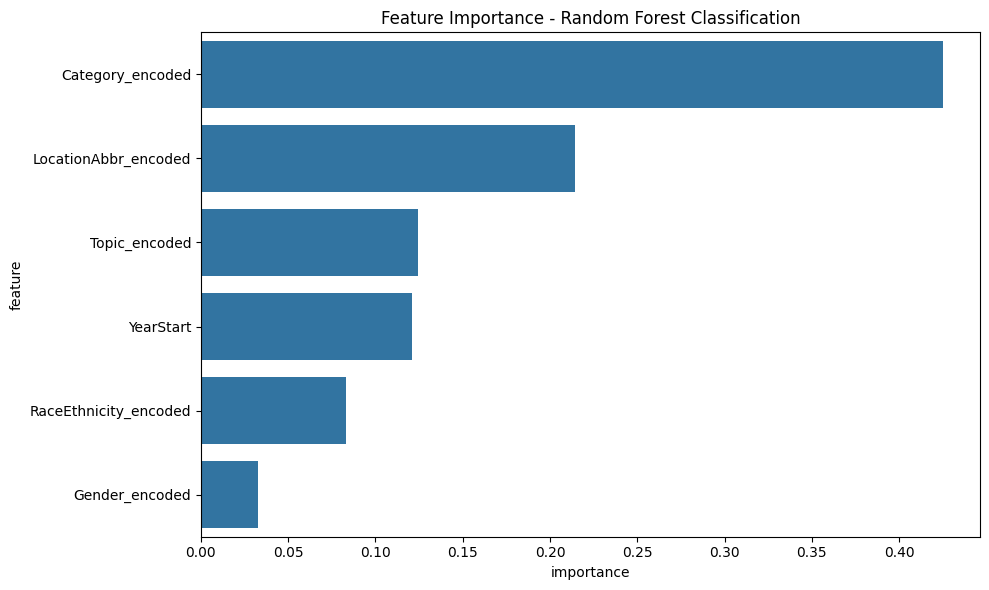

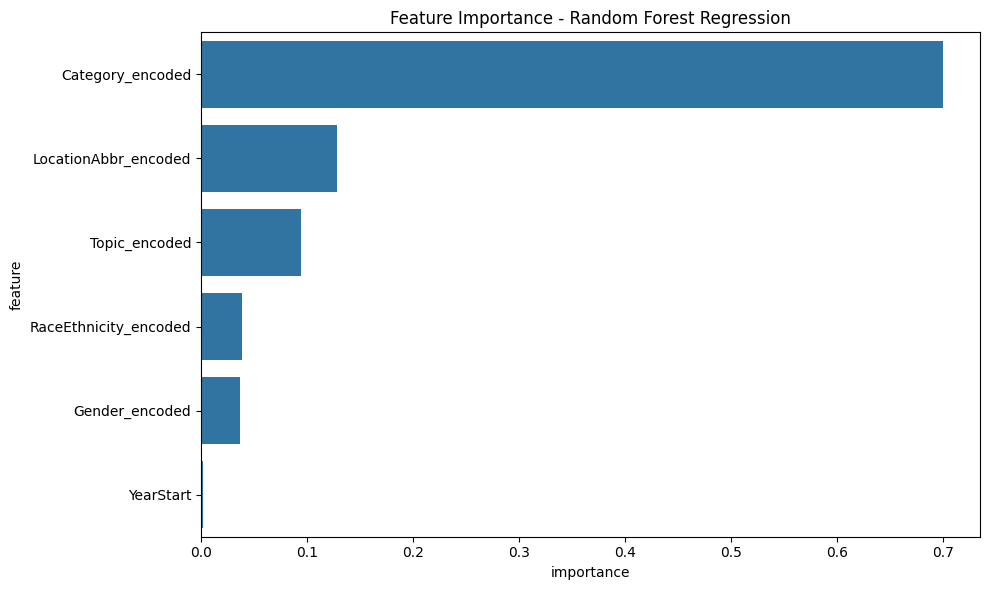

In [30]:
def main():
    # Load and preprocess data
    combined_df, le_dict = load_and_preprocess_data(
        "National_Health_and_Nutrition_Examination_Survey__NHANES____Vision_and_Eye_Health_Surveillance.xlsx",
        "National_Survey_of_Children_s_Health__NSCH____Vision_and_Eye_Health_Surveillance.csv"
    )

    # Prepare features
    X_scaled, y, feature_cols = prepare_features(combined_df)

    # Classification analysis
    print("\nPerforming Classification Analysis...")
    y_binary = create_binary_target(y, threshold=y.median())
    classification_results = train_classification_models(X_scaled, y_binary)
    plot_classification_results(classification_results)

    # Print classification reports
    print("\nLogistic Regression Classification Report:")
    print(classification_results['logistic_regression']['report'])
    print("\nRandom Forest Classification Report:")
    print(classification_results['random_forest']['report'])

    # Regression analysis
    print("\nPerforming Regression Analysis...")
    regression_results = train_regression_models(X_scaled, y)
    plot_regression_results(regression_results)

    # Print regression metrics
    print("\nLinear Regression Metrics:")
    print(f"MSE: {regression_results['linear_regression']['mse']:.4f}")
    print(f"R2: {regression_results['linear_regression']['r2']:.4f}")
    print("\nRandom Forest Regression Metrics:")
    print(f"MSE: {regression_results['random_forest']['mse']:.4f}")
    print(f"R2: {regression_results['random_forest']['r2']:.4f}")

    # Feature importance analysis
    print("\nAnalyzing Feature Importance...")
    analyze_feature_importance(
        classification_results['random_forest']['model'],
        feature_cols,
        'Random Forest Classification'
    )
    analyze_feature_importance(
        regression_results['random_forest']['model'],
        feature_cols,
        'Random Forest Regression'
    )

if __name__ == "__main__":
    main()

#Conclusion

The patterns and findings of the NHANES-NSCH vision health surveillance datasets show disparities and trend of vision health by demographic characteristics and geographical location. The results demonstrate that children on average have better vision health (approximately 25% better) than the adult population and seniors due, in part, to better preventive care and early detection initiatives. The temporal analysis from 1999 to 2017 shows a favorable trend in screening rate, which is as high as 68-69% in the recent years while blindness and difficulty seeing remained almost unchanged and low at 1-2%. Explorations by geography exhibit reasonable homogeneity of vision health, hovering between 30% and 35% across states, although there are discrepancies that could be due to disparity in access to health and policies.


This helped to get complementary views on vision health determinants from the set of machine learning models. Classification and regression models of the Random Forest class In this paper were further accurate than linear models and indicated the complexity of relations between demographic characteristics and vision health indicators as well as interactions. Exploratory feature importance analysis revealed age, location, and race/ethnicity as highly relevant for vision health indicators as the top ranked feature importance factor for each. The regression models’ goodness-of-fit statistics (R² and MSE) show that vision health outcomes can be reasonably well predicted by the set of predictor variables but there still exists random error perhaps due to hard to measure and control confounding variables such as socio-economic status, lifestyle factors and other environmental impacts not present in the current datasets. Accordingly, these results underscore the need for approachable and more developed vision health programs that require consideration of demographic characteristics and the accessibility of regional healthcare while indicate further research and policy direction.